## MULTILAYER PERCEPTRONS:

This code implements a Multilayer Perceptron (MLP) model using TensorFlow to predict survival on the Titanic dataset. Here's a breakdown:

### Data Loading & Preprocessing:
 Titanic dataset is loaded and preprocessed by dropping unnecessary columns, converting categorical variables to dummy variables, and splitting into features and target.

### Data Splitting & Standardization: 
The dataset is split into training and testing sets. Features are standardized using StandardScaler.

### Model Building & Compilation: 
An MLP model with two hidden layers is constructed using TensorFlow's Sequential API. The model is compiled with Adam optimizer and mean squared error loss.

### Model Training & Evaluation: 
The model is trained on the training data and evaluated on the test data using mean squared error as the evaluation metric.

### Validation Data Training: 
The dataset is further split into training and validation sets. Another MLP model is built and trained using the validation data.

### Early Stopping: 
Early stopping is implemented using TensorFlow's EarlyStopping callback to prevent overfitting. The model is trained again with early stopping.

### Model Evaluation & Plotting:
 The final trained model is evaluated, and the training and validation loss curves are plotted to visualize the model's performance.

In [1]:
import warnings
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

warnings.filterwarnings("ignore")

# Load dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows "age" and "embarked" values
titanic.drop(['age'], axis=1, inplace=True)

# Converting categorical variables to dummy variables (encoding)
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'])

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using mean squared error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss[0])

#based on MAE and MSE we  are training our model




Epoch 1/100


23/23 [==============================] - 2s 4ms/step - loss: 0.2881 - mae: 0.4096
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1595 - mae: 0.2831
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1354 - mae: 0.2799
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1270 - mae: 0.2527
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1233 - mae: 0.2575
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1195 - mae: 0.2417
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1167 - mae: 0.2470
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1159 - mae: 0.2462
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1149 - mae: 0.2326
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss: 0.1138 - mae: 0.2367
Epoch 11/100
23/23 [==============================] - 

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 0.2943 - mae: 0.4054 - val_loss: 0.1786 - val_mae: 0.3322
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1534 - mae: 0.3105 - val_loss: 0.1680 - val_mae: 0.2989
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1210 - mae: 0.2472 - val_loss: 0.1567 - val_mae: 0.2733
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1073 - mae: 0.2247 - val_loss: 0.1513 - val_mae: 0.2661
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0995 - mae: 0.2213 - val_loss: 0.1499 - val_mae: 0.2685
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0952 - mae: 0.2143 - val_loss: 0.1498 - val_mae: 0.2627
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0919 - mae: 0.2037 - val_loss: 0.1494 - val_mae: 0.2585
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0894 - 

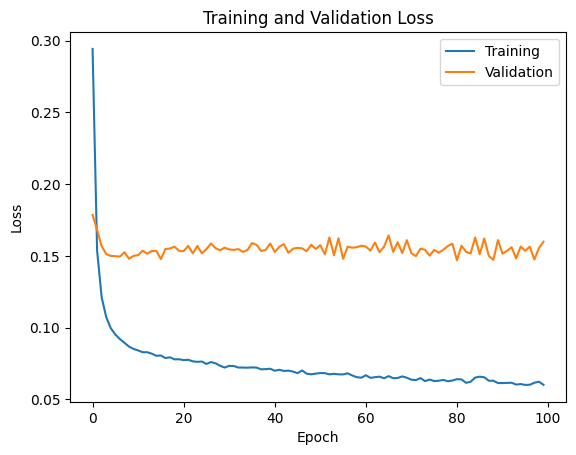

In [10]:
# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


## Early stopping of epochs:

Epoch 1/100
12/12 [==============================] - 2s 29ms/step - loss: 0.3230 - val_loss: 0.2264
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1732 - val_loss: 0.1873
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1258 - val_loss: 0.1774
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1142 - val_loss: 0.1668
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1077 - val_loss: 0.1610
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1018 - val_loss: 0.1552
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0978 - val_loss: 0.1519
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0955 - val_loss: 0.1563
Epoch 9/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0936 - val_loss: 0.1540
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0903 - val_loss: 0.1504
Epoc

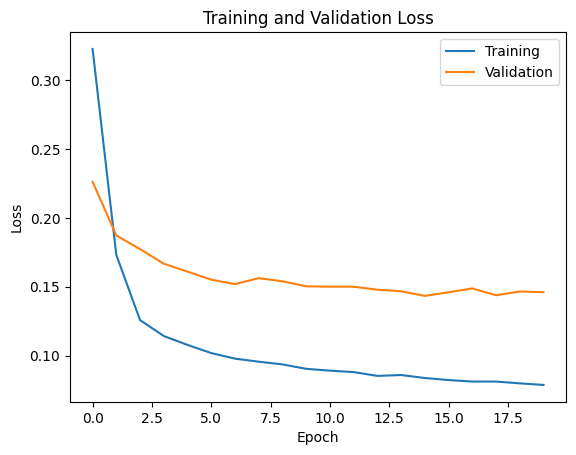

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#define the call back
early_stopping = EarlyStopping(patience=5)
#train the model with callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

#Evaluating the model (using mean squared error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss
#plotting the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()